In [95]:
import pandas as pd
from pykml.factory import KML_ElementMaker as KML
from lxml import etree
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [96]:
file_name = 'csv/fev.csv'

In [97]:
df = pd.read_csv(filepath_or_buffer=file_name, sep=';')

In [98]:
df.head()

,AHE,Número do cadastro,Número da portaria,Nome do usuário de água,CPF/CNPJ,Natureza da intervenção,Tipo da Fonte de Captação,Tipo de Intervenção,Classificação,Status,...,Nº da licença,Nome do responsável técnico,CPF do responsável técnico,Formação do responsável técnico,Número da ART do responsável técnico,Nome da Geometria,Latitude,Longitude,Latitude (ponto final),Longitude (ponto final)
0,NaN,2016/005.487,-,Marlon Roberto Bonamigo,474.462.850-87,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Concluído,...,-,-,-,-,-,Ponto 1,-52.549732,-30.751130,-,-
1,NaN,2016/006.690,-,LAGOS GERAÇÃO E COMERCIALIZAÇÃO DE ENERGIA LTDA,20.249.185/0001-80,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Concluído,...,-,-,-,-,-,Ponto 1,-53.741389,-28.229444,-,-
2,NaN,2016/007.016,-,Rincão Energia S.A.,16.874.764/0001-46,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Concluído,...,-,-,-,-,-,Ponto 1,-54.297800,-28.421200,-,-
3,NaN,2016/001.993,-,ENERBIO SERVICOS DE ENGENHARIA LTDA,05.385.865/0001-37,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Concluído,...,-,-,-,-,-,Ponto 1,-53.101709,-29.255926,-,-
4,NaN,2016/000.592,-,Paulo Soares Blessmann,206.046.370-04,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Desativado,...,-,-,-,-,-,Ponto 1,-51.023276,-28.807151,-,-


In [99]:
#filtro_intervencao = df['Tipo de Intervenção'] == 'Cadastro apenas da barragem'
filtro_status1 = df['Status'] == 'Aguardando análise'
filtro_status2 = df['Status'] == 'Aguardando alterações de dados inconsistentes'
filtro_status3 = df['Status'] == 'Concedida'
filtro_status4 = df['Status'] == 'Indeferida'
filtro_status5 = df['Status'] == 'Em análise'

In [100]:
u_status = ['Concedida', 'Indeferida', 'Em análise', 'Aguardando análise', 'Aguardando alterações de dados inconsistentes']

In [101]:
df = df[filtro_status1 | filtro_status2 | filtro_status3 | filtro_status4 | filtro_status5]

In [102]:
df.shape

(78, 55)

In [103]:
shp_path = "estados_2010.shp"

In [104]:
estados = geopandas.read_file(shp_path)

In [106]:
pie_dict = {}
for s in u_status:
    ns = sum(df['Status'] == s)
    pie_dict[s] = ns

In [107]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

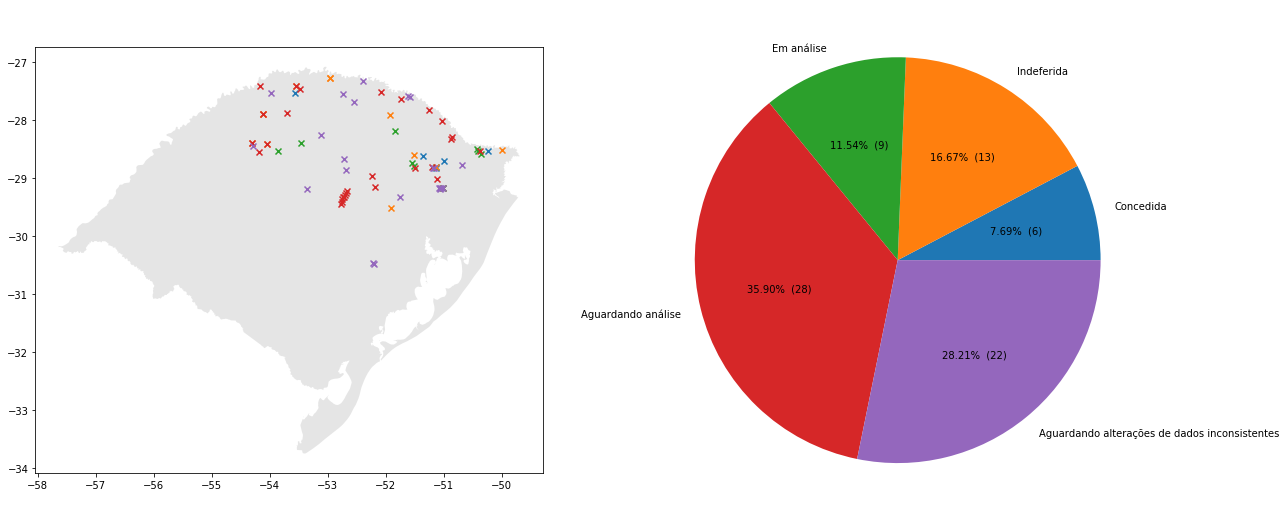

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
ax2.pie(pie_dict.values(), autopct=make_autopct(pie_dict.values()), labels=pie_dict.keys())
#plot_shape(22, ax1, sf)
estados[estados['sigla'] == 'RS'].plot(color='gray', ax=ax1, alpha=0.2)
#bacias.plot(edgecolor='black', color='gray', ax=ax1, alpha=0.1)
for s in u_status:
    f = df['Status'] == s
    x, y = df[f]['Latitude'].values, df[f]['Longitude'].values
    #x, y = [float(i.replace(',','.')) for i in x], [float(i.replace(',','.')) for i in y]
    ax1.scatter(x, y, label = s, marker='x')
ax1.axis('scaled')
#fig.suptitle('Processos em janeiro - Total {}'.format(df.shape[0]))
#ax2.legend(loc='upper right')
plt.savefig('02_Status_fev', bbox_inches='tight')